# Part 2: Random networks and plotting in `networkx`
 
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

**In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.**

**Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10e-3.**



**What is the expected number of links, 〈L〉?**

*Expected number of links $\langle L \rangle$ is expressed with formula:*
$$\langle L \rangle = \frac{pN(N-1)}{2}$$

*The reasoning behind it is following: each link is created with probability $p$. There are N nodes, and each can connect with N-1 other nodes. The graph is undirected, so we need divide the number of links by two to arrive at the correct amount.*

*Hence, the expected link count is $\langle L \rangle = \frac{pN(N-1)}{2} = \frac{3000(3000-1)}{2 \cdot 10^3} = 4498.5$*

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt

**In which regime is the network?**

In [35]:
p = 10e-3
N = 3000
L = p*(N)*(N-1)/2
average_degree_k = 2 * L / N 
f"{average_degree_k} = ⟨k⟩ > ln(N) = {round(math.log(N, np.e),3)}"

'29.99 = ⟨k⟩ > ln(N) = 8.006'

It follows that $\langle k \rangle > ln(N)$, hence this network is in a **"fully connected regime"**.

**Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).**

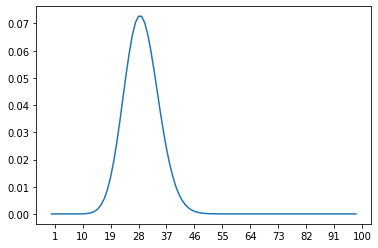

In [96]:
def poisson_distr(k):
    return np.exp(-average_degree_k) * average_degree_k ** k / math.factorial(k)
    
P = [poisson_distr(k) for k in np.arange(1,100)]

plt.plot(P)
plt.xticks(ticks=np.linspace(1,100, num=12))
plt.show()

**Calculate the probability $p_c$ so that the network is at the critical point**  
We use the relation between $\langle k \rangle$, $p$ and $N$:
$$
\langle k \rangle = p \cdot (N-1)
$$
$$
p = \frac{\langle k \rangle}{N-1} 
$$

The network is at the critical point, when it follows that:  
$$
\langle k \rangle = 1
$$

Hence:
$$
p_c = \frac{1}{3000-1} 
$$


In [36]:
p_c = 1 / (N-1)
round(p_c, 4)

0.0003

The probability $p_c$ so that network is a the critical point is $p_c=0.0003$

**Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N_{cr}$ so that the network has only one component.**  


Taking into consideration that this is a random network modelled with probabilistic distribution, we never can be certain about a sample of the graph. In theory it could happen that no connection is created if the probability is $p \neq 1$.

However, we know that a graph will most likely form a giant component, when it is in the fully connected regime, which we enter with:
$$
p = \frac{lnN}{N}
$$

Which is satisfied by $N =  9118$

In [77]:
f"p computed for N = 9118 yields {math.log(9118, np.e) / 9118}, which is very close to 0.001"

'p computed for N = 9118 yields 0.0010000006318023017, which is very close to 0.001'

**For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.**  


In [81]:
p = 0.001
N = 9118
k_cr = p * (N-1)
f"Average degree k is {k_cr}"

'Average degree k is 9.117'

We know, that average distance is $\langle d \rangle \approx \frac{ln(N)}{ln(k)}$, hence we have:

In [85]:
f"⟨𝑑⟩ = {round(math.log(N, np.e) / math.log(k, np.e),3)}"

'⟨𝑑⟩ = 23.542'

* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.


**Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size)**

In [37]:
import networkx as nx
N = 300
p=0.005

G = nx.erdos_renyi_graph(n=N, p=p)
k = round(np.mean([d for _, d in G.degree()]),3)
k, 1.5

(1.473, 1.5)

In [38]:
def degree_to_color(degree):
    if degree < 2:
        return "#c5dff0"
    if degree < 4:
        return "#65728d"
    if degree < 6:
        return "#000000"
    else: 
        return "#ff0000"

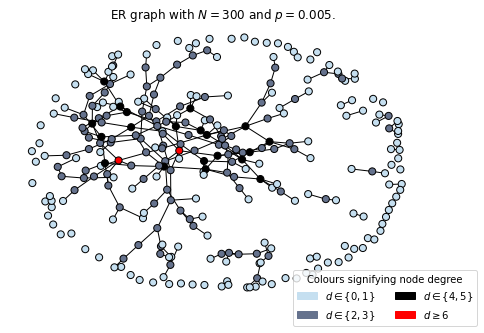

In [66]:
def plot_graph_showing_degrees(G, title="", legend_title=""):
    degree_color = [degree_to_color(d) for _id, d in G.degree()]
    nx.draw(G, pos=nx.spring_layout(G, k=0.3, iterations=150), with_labels=False, node_size=50, node_color=degree_color)
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#000000") 


    import matplotlib.patches as mpatches

    patch1 = mpatches.Patch(color="#c5dff0", label='$d \in \{0, 1\}$')
    patch2 = mpatches.Patch(color="#65728d", label='$d \in \{2, 3\}$')
    patch3 = mpatches.Patch(color="#000000", label='$d \in \{4, 5\}$')
    patch4 = mpatches.Patch(color="#ff0000", label='$d \geq 6$')

    plt.legend(handles=[patch1, patch2, patch3, patch4], title=legend_title, loc='right', bbox_to_anchor=(1.1, 0.05),
          ncol=2, fancybox=True)
    plt.title(title)
    plt.show()
plot_graph_showing_degrees(G, "ER graph with $N=300$ and $p=0.005$.", "Colours signifying node degree")

**Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)**

In [67]:
C = nx.connected_components(G)
largest_component = None
largest_size = 0
for c in C:
    if len(c) > largest_size:
        largest_size = len(c)
        largest_component = G.subgraph(c).copy()

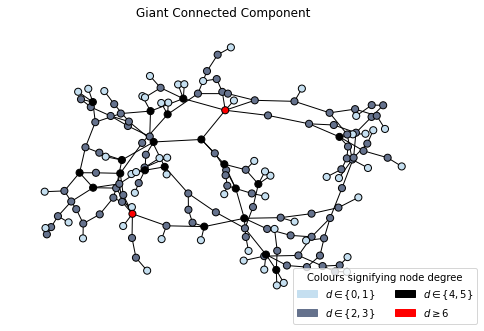

In [68]:
plot_graph_showing_degrees(largest_component, "Giant Connected Component", "Colours signifying node degree")

**Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)**

In [70]:
random_node_id = np.random.choice(largest_component.nodes())

**Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)**

In [71]:
node_to_distance = nx.single_source_shortest_path_length(largest_component, source=random_node_id, cutoff=2)

nodes_with_2_steps = {node_id 
             for node_id, distance 
             in node_to_distance.items() 
             if distance == 2}
nodes_with_2_steps

{45, 240}

**Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.**

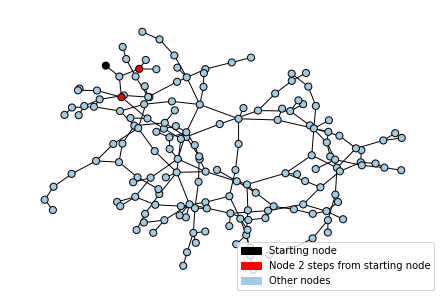

In [72]:
def node_to_color(node, node_to_distance):
    #Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2")
    if node in node_to_distance:
        if node_to_distance[node] == 0:
            return "#000000"
        if node_to_distance[node] == 2:
            return "#ff0000"
    return "#A0CBE2"
    
    

def plot_graph_showing_distances(G):
    colors = [node_to_color(n, node_to_distance) for n in  G.nodes()]

    nx.draw(G, pos=nx.spring_layout(G, k=0.3, iterations=150), with_labels=False, node_size=50, node_color=colors)
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#000000") 


    import matplotlib.patches as mpatches

    patch1 = mpatches.Patch(color="#000000", label='Starting node')
    patch2 = mpatches.Patch(color="#ff0000", label='Node 2 steps from starting node')
    patch3 = mpatches.Patch(color="#A0CBE2", label='Other nodes')

    plt.legend(handles=[patch1, patch2, patch3], loc="lower right")
    plt.show()
plot_graph_showing_distances(largest_component)